# ***IMPORTING THE IMPORTANT LIBRARIES AND LOADING THE DATASET***

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
import joblib

***LOADING THE DATASET***

In [165]:

file_path = 'anxiety.csv'
data = pd.read_csv(file_path, encoding='latin1')

***IMPLEMENTING EXPLORATORY DATA ANALYSIS***

In [166]:
# Reading the First 5 rows of the dataset 
data.head()

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [167]:
# Reading the last 5 rows of the dataset 
data.tail()

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
13459,14246,42057.75678,1,0,0,1,0,1,1,Not difficult at all,...,France,France,Reddit,Multiplayer - online - with strangers,Accept,4,28,7.0,FRA,FRA
13460,14247,42057.81185,3,3,3,3,2,3,3,Extremely difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,20,23,25.0,USA,USA
13461,14248,42058.16964,0,0,0,0,0,0,0,Not difficult at all,...,Norway,Norway,Reddit,Multiplayer - online - with real life friends,Accept,0,32,10.0,NOR,NOR
13462,14249,42058.24420,3,2,1,3,0,1,3,Somewhat difficult,...,Canada,Canada,Reddit,Singleplayer,Accept,13,16,32.0,CAN,CAN
13463,14250,42058.36375,1,1,0,0,0,0,0,Somewhat difficult,...,Canada,Canada,Reddit,Multiplayer - online - with strangers,Accept,2,25,14.0,CAN,CAN


***columns present***

In [168]:
data.columns

Index(['S. No.', 'Timestamp', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6',
       'GAD7', 'GADE', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game',
       'Platform', 'Hours', 'earnings', 'whyplay', 'League', 'highestleague',
       'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6',
       'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13',
       'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Narcissism', 'Gender', 'Age',
       'Work', 'Degree', 'Birthplace', 'Residence', 'Reference', 'Playstyle',
       'accept', 'GAD_T', 'SWL_T', 'SPIN_T', 'Residence_ISO3',
       'Birthplace_ISO3'],
      dtype='object')

In [169]:

columns_to_drop = [
    'S. No.', 'Timestamp', 'Birthplace', 'Residence', 
    'Reference', 'accept', 'Playstyle', 'Residence_ISO3', 'Birthplace_ISO3','whyplay','highestleague','streams','earnings','League','SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6',
       'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13',
       'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Narcissism','SPIN_T', 'Platform']

In [170]:
df = data.drop(columns=columns_to_drop)

In [171]:
df

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,...,SWL4,SWL5,Game,Hours,Gender,Age,Work,Degree,GAD_T,SWL_T
0,0,0,0,0,1,0,0,Not difficult at all,3,5,...,5,5,Skyrim,15.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),1,23
1,1,2,2,2,0,1,0,Somewhat difficult,3,5,...,5,1,Other,8.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),8,16
2,0,2,2,0,0,3,1,Not difficult at all,2,6,...,2,2,Other,0.0,Female,32,Employed,Bachelor (or equivalent),8,17
3,0,0,0,0,0,0,0,Not difficult at all,2,5,...,3,2,Other,20.0,Male,28,Employed,Bachelor (or equivalent),0,17
4,2,1,2,2,2,3,2,Very difficult,2,2,...,5,1,Other,20.0,Male,19,Employed,High school diploma (or equivalent),14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,1,0,0,1,0,1,1,Not difficult at all,6,6,...,5,6,Other,40.0,Male,22,Student at college / university,Master (or equivalent),4,28
13460,3,3,3,3,2,3,3,Extremely difficult,5,5,...,4,4,League of Legends,20.0,Female,20,Student at college / university,High school diploma (or equivalent),20,23
13461,0,0,0,0,0,0,0,Not difficult at all,6,6,...,7,6,Starcraft 2,20.0,Male,19,Student at college / university,High school diploma (or equivalent),0,32
13462,3,2,1,3,0,1,3,Somewhat difficult,2,6,...,2,3,Other,5.0,Female,18,Student at school,High school diploma (or equivalent),13,16


***Check for null values and sum them up***

In [172]:

null_values_sum = df.isnull().sum()

In [173]:
# Display the result
print(null_values_sum)

GAD1         0
GAD2         0
GAD3         0
GAD4         0
GAD5         0
GAD6         0
GAD7         0
GADE       649
SWL1         0
SWL2         0
SWL3         0
SWL4         0
SWL5         0
Game         0
Hours       30
Gender       0
Age          0
Work        38
Degree    1577
GAD_T        0
SWL_T        0
dtype: int64


GAD1, GAD2, GAD3, GAD4, GAD5, GAD6, GAD7, SWL1, SWL2, SWL3, SWL4, SWL5, GAD_T, SWL_T have no missing values (0 null values).

GADE has 649 missing values.

Hours has 30 missing values.

Degree has 1577 missing values.








***Fill null values***

In [174]:
 
for column in df.columns:
    if df[column].dtype == 'object':
        # Fill categorical columns with the mode
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Fill numerical columns with the mean
        df[column].fillna(df[column].mean(), inplace=True)

C:\Users\0931\AppData\Local\Temp\ipykernel_2528\2614986563.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
C:\Users\0931\AppData\Local\Temp\ipykernel_2528\2614986563.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

***Verify that there are no more null values***

In [175]:

null_values_sum_after = df.isnull().sum()
print(null_values_sum_after)

GAD1      0
GAD2      0
GAD3      0
GAD4      0
GAD5      0
GAD6      0
GAD7      0
GADE      0
SWL1      0
SWL2      0
SWL3      0
SWL4      0
SWL5      0
Game      0
Hours     0
Gender    0
Age       0
Work      0
Degree    0
GAD_T     0
SWL_T     0
dtype: int64


There is no null values in the dataset

In [176]:
#Knowing the description of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GAD1    13464 non-null  int64  
 1   GAD2    13464 non-null  int64  
 2   GAD3    13464 non-null  int64  
 3   GAD4    13464 non-null  int64  
 4   GAD5    13464 non-null  int64  
 5   GAD6    13464 non-null  int64  
 6   GAD7    13464 non-null  int64  
 7   GADE    13464 non-null  object 
 8   SWL1    13464 non-null  int64  
 9   SWL2    13464 non-null  int64  
 10  SWL3    13464 non-null  int64  
 11  SWL4    13464 non-null  int64  
 12  SWL5    13464 non-null  int64  
 13  Game    13464 non-null  object 
 14  Hours   13464 non-null  float64
 15  Gender  13464 non-null  object 
 16  Age     13464 non-null  int64  
 17  Work    13464 non-null  object 
 18  Degree  13464 non-null  object 
 19  GAD_T   13464 non-null  int64  
 20  SWL_T   13464 non-null  int64  
dtypes: float64(1), int64(15), object(5)

***GET THE COLUMNS WHICH ARE UNIQUE***

In [177]:
df.nunique

<bound method DataFrame.nunique of        GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7                  GADE  SWL1  \
0         0     0     0     0     1     0     0  Not difficult at all     3   
1         1     2     2     2     0     1     0    Somewhat difficult     3   
2         0     2     2     0     0     3     1  Not difficult at all     2   
3         0     0     0     0     0     0     0  Not difficult at all     2   
4         2     1     2     2     2     3     2        Very difficult     2   
...     ...   ...   ...   ...   ...   ...   ...                   ...   ...   
13459     1     0     0     1     0     1     1  Not difficult at all     6   
13460     3     3     3     3     2     3     3   Extremely difficult     5   
13461     0     0     0     0     0     0     0  Not difficult at all     6   
13462     3     2     1     3     0     1     3    Somewhat difficult     2   
13463     1     1     0     0     0     0     0    Somewhat difficult     5   

       SWL2  ...

***Finding the Datatypes in the dataset***

In [178]:
df.dtypes

GAD1        int64
GAD2        int64
GAD3        int64
GAD4        int64
GAD5        int64
GAD6        int64
GAD7        int64
GADE       object
SWL1        int64
SWL2        int64
SWL3        int64
SWL4        int64
SWL5        int64
Game       object
Hours     float64
Gender     object
Age         int64
Work       object
Degree     object
GAD_T       int64
SWL_T       int64
dtype: object

In [179]:
#label encoding the data.
# Store original column names
original_columns = df.select_dtypes(include='object').columns

# Initialize LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical variable
for col in original_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Print the mapping between original categories and numerical labels
for col, encoder in label_encoders.items():
    print(f"Mapping for column '{col}':")
    for label, category in enumerate(encoder.classes_):
        print(f"Label {label}: {category}")

Mapping for column 'GADE':
Label 0: Extremely difficult
Label 1: Not difficult at all
Label 2: Somewhat difficult
Label 3: Very difficult
Mapping for column 'Game':
Label 0: Counter Strike
Label 1: Destiny
Label 2: Diablo 3
Label 3: Guild Wars 2
Label 4: Hearthstone
Label 5: Heroes of the Storm
Label 6: League of Legends
Label 7: Other
Label 8: Skyrim
Label 9: Starcraft 2
Label 10: World of Warcraft
Mapping for column 'Gender':
Label 0: Female
Label 1: Male
Label 2: Other
Mapping for column 'Work':
Label 0: Employed
Label 1: Student at college / university
Label 2: Student at school
Label 3: Unemployed / between jobs
Mapping for column 'Degree':
Label 0: Bachelor (or equivalent)
Label 1: High school diploma (or equivalent)
Label 2: Master (or equivalent)
Label 3: Ph.D., Psy. D., MD (or equivalent)


In [180]:
df.dtypes

GAD1        int64
GAD2        int64
GAD3        int64
GAD4        int64
GAD5        int64
GAD6        int64
GAD7        int64
GADE        int32
SWL1        int64
SWL2        int64
SWL3        int64
SWL4        int64
SWL5        int64
Game        int32
Hours     float64
Gender      int32
Age         int64
Work        int32
Degree      int32
GAD_T       int64
SWL_T       int64
dtype: object

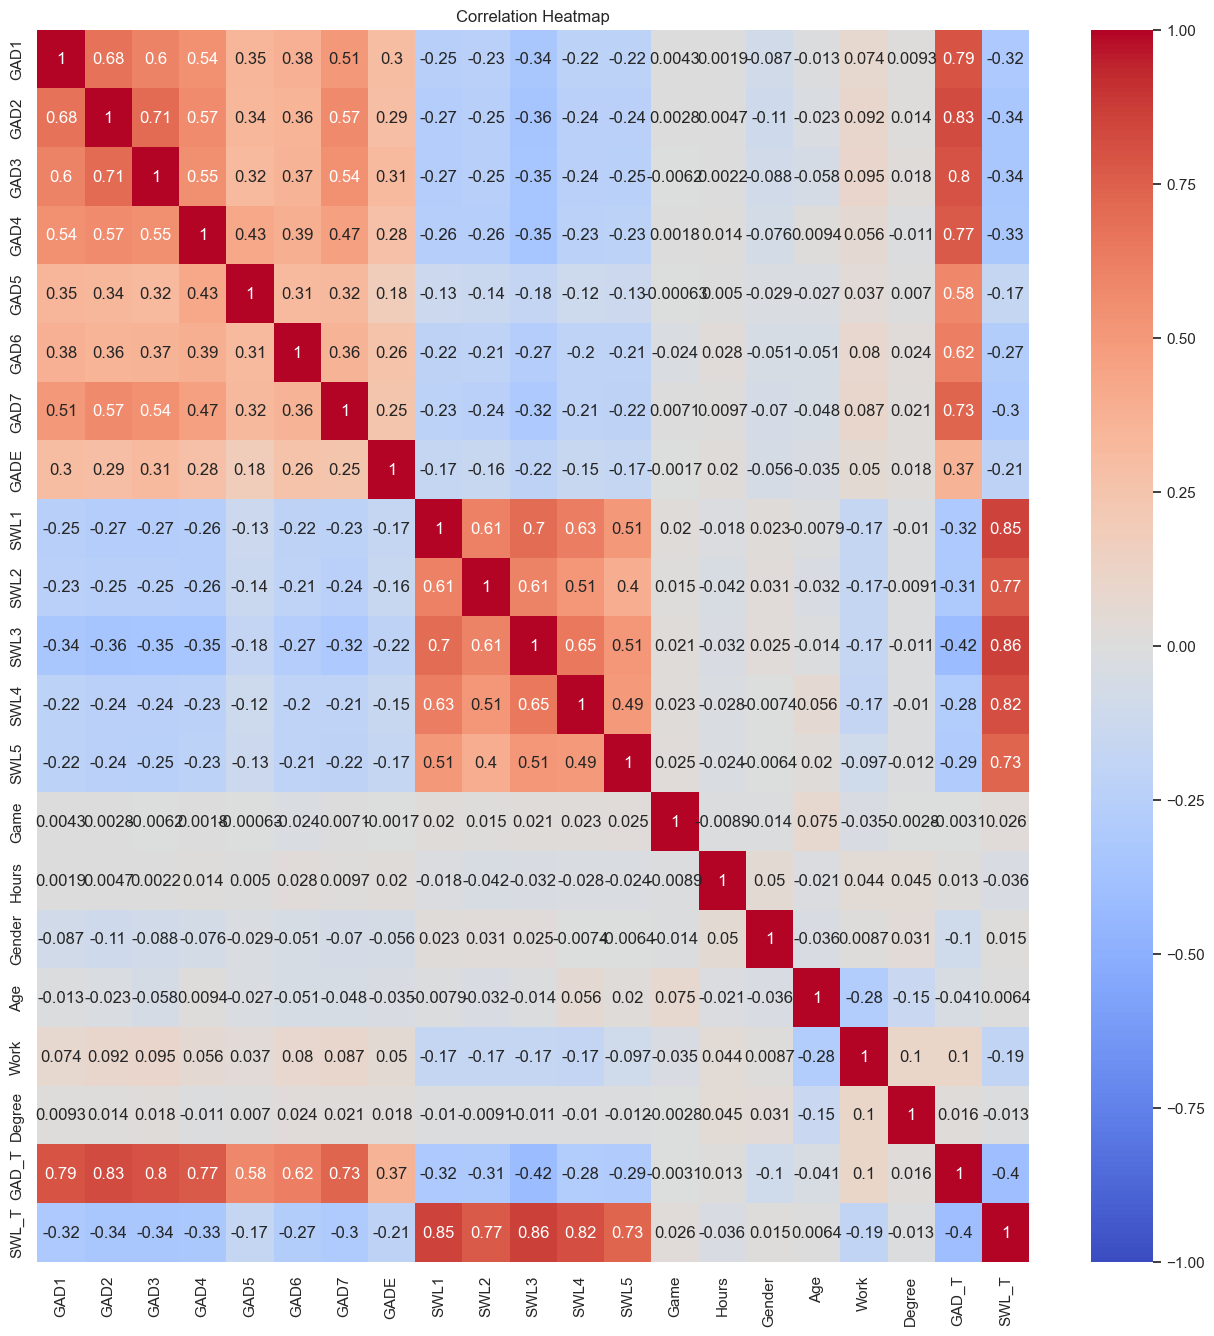

In [181]:
# Plot 3: Correlation Heatmap
plt.figure(figsize=(16, 16))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

GAD Scores (GAD1 to GAD7)
High Positive Correlations Within GAD Items:

The GAD items (GAD1 to GAD7) show high positive correlations with each other, ranging from 0.54 to 0.71. This indicates that individuals who score high on one GAD item tend to score high on other GAD items as well.
For example, GAD1 has a correlation of 0.68 with GAD2, 0.66 with GAD3, and so on.

Total GAD Score (GAD_T):
The total GAD score (GAD_T) is highly correlated with each individual GAD item, with correlations ranging from 0.62 to 0.83. This is expected since GAD_T is the sum of the individual GAD scores.
SWL Scores (SWL1 to SWL5)

High Positive Correlations Within SWL Items:

The SWL items (SWL1 to SWL5) also show high positive correlations with each other, ranging from 0.49 to 0.70. This suggests that individuals who are satisfied with one aspect of their life tend to be satisfied with other aspects as well.

For example, SWL1 has a correlation of 0.61 with SWL2, 0.67 with SWL3, and so on.

Total SWL Score (SWL_T):
The total SWL score (SWL_T) is highly correlated with each individual SWL item, with correlations ranging from 0.77 to 0.86. This is expected since SWL_T is the sum of the individual SWL scores.
GAD and SWL Scores

Negative Correlation Between GAD and SWL:
There is a moderate negative correlation between the total GAD score (GAD_T) and the total SWL score (SWL_T), with a correlation of -0.40. This suggests that higher anxiety levels are associated with lower life satisfaction.
Individual GAD items also show negative correlations with SWL items, ranging from -0.22 to -0.36.
Other Features

Game, Platform, and Hours:
These features show weaker correlations with the GAD and SWL scores, indicating that gaming habits have a less direct relationship with anxiety and life satisfaction compared to the direct measures from the GAD and SWL scales.

Demographic Variables:
Age, gender, degree, and work show varying correlations with GAD and SWL scores, generally weaker compared to the correlations within GAD and SWL items.

Interpretation
The heatmap effectively highlights the internal consistency of the GAD-7 and SWL scales, as evidenced by the high correlations within each set of items.

The negative correlation between GAD and SWL scores aligns with the expectation that higher anxiety is associated with lower life satisfaction.

The correlations involving demographic variables and gaming habits are generally weaker, suggesting more complex relationships that might require additional analysis.

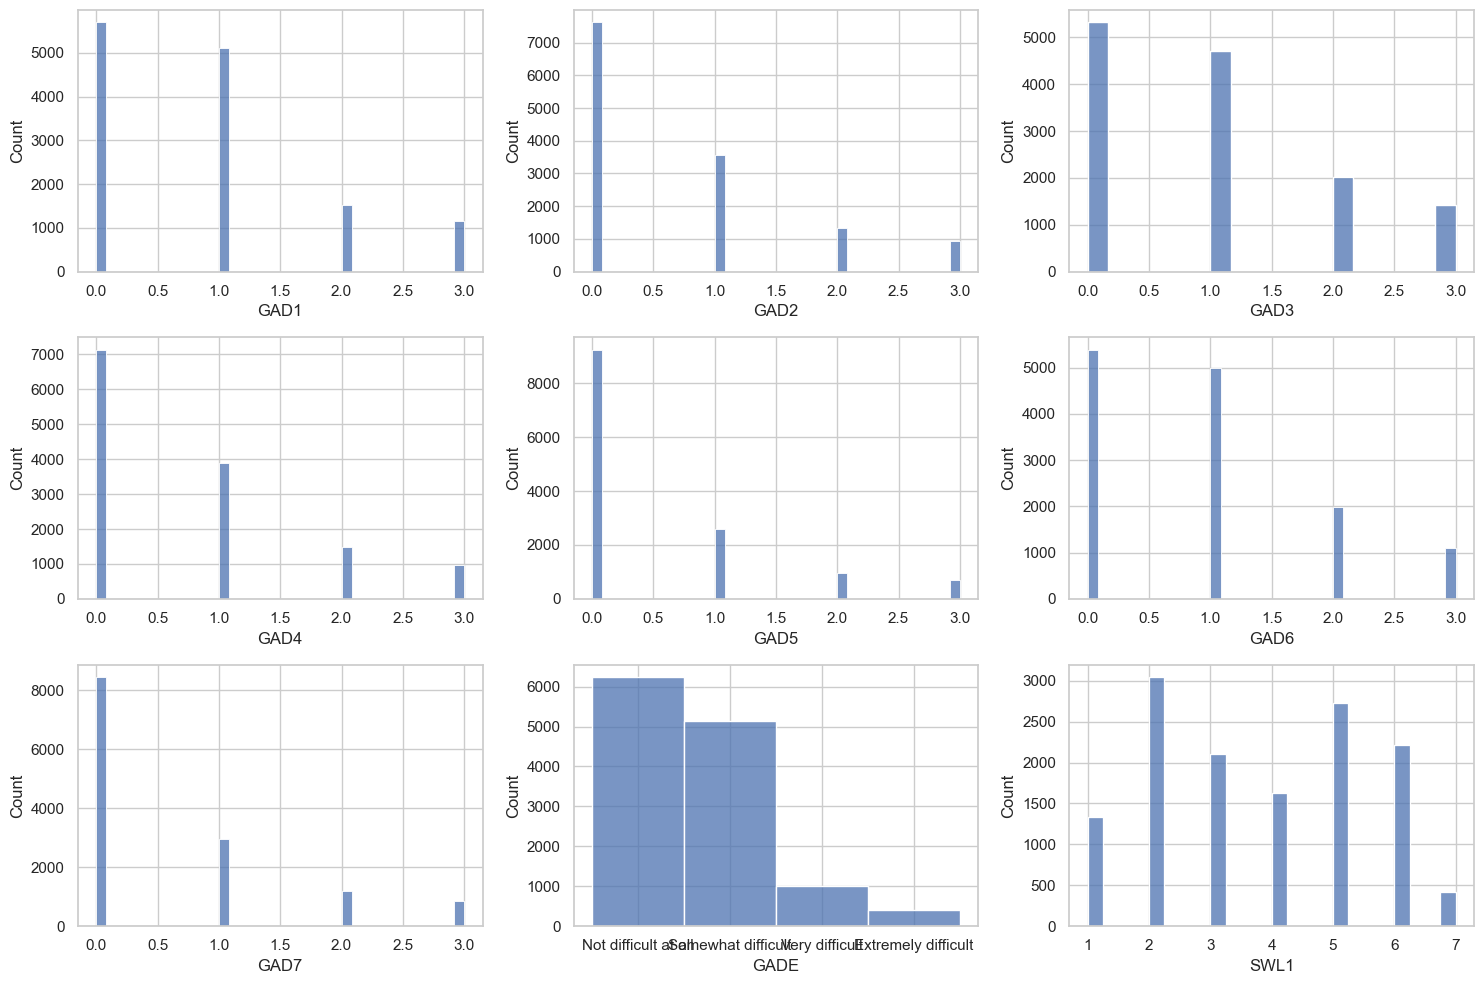

In [182]:
# Distribution of GAD Scores
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for i, col in enumerate(data.columns[2:11]):
    sns.histplot(data[col], ax=axes[i//3, i%3])
fig.tight_layout()
plt.show()

GAD1: The majority of responses are centered around 0 and 1, indicating that most participants reported lower levels of anxiety for the first question.

GAD2: Similar to GAD1, the responses are primarily around 0, with a notable number at 1, showing low anxiety levels for the second question.

GAD3: Most responses are again around 0 and 1, suggesting low anxiety levels for the third question.

GAD4: The responses are concentrated at 0 and 1, indicating lower anxiety levels for the fourth question.

GAD5: This question shows a predominant response of 0, with fewer responses at higher anxiety levels.

GAD6: The distribution is similar to the previous GAD questions, with responses mainly at 0 and 1.

GAD7: Again, the majority of responses are at 0, followed by 1, suggesting lower anxiety levels.

GADE: This plot shows the distribution of overall difficulty experienced due to anxiety. Most participants found it 
"Not difficult at all" or "Somewhat difficult," with fewer reporting higher levels of difficulty.

SWL1: This subplot shows the distribution of responses for the Satisfaction with Life Scale. The responses are more spread out across the scale, with peaks around 2, 5, and 6, indicating varying levels of life satisfaction among participants.

In [183]:

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

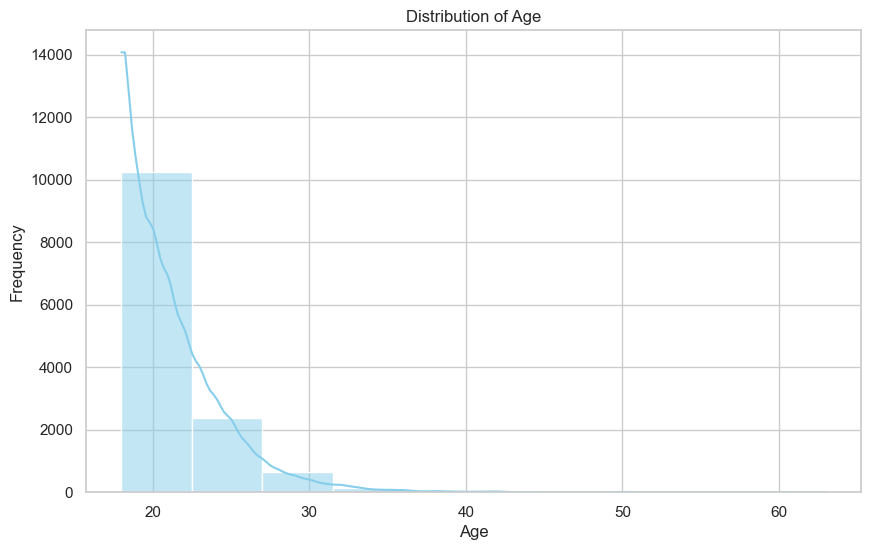

In [184]:
# Plot 1: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Distribution of Age: A histogram showing the age distribution of the respondents.

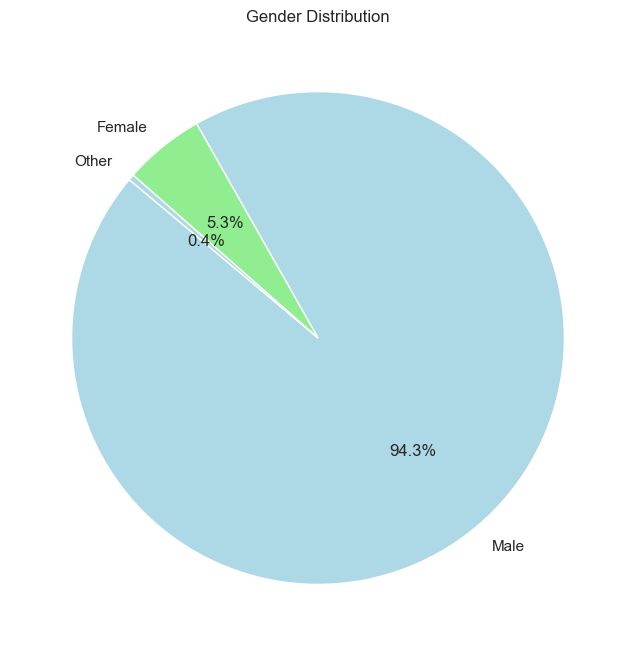

In [185]:
# Plot 2: Gender Distribution
plt.figure(figsize=(8, 8))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=140)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

Gender Distribution: A pie chart showing the gender distribution.

C:\Users\0931\AppData\Local\Temp\ipykernel_2528\391878980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Degree', data=data, palette='viridis', order=data['Degree'].value_counts().index)


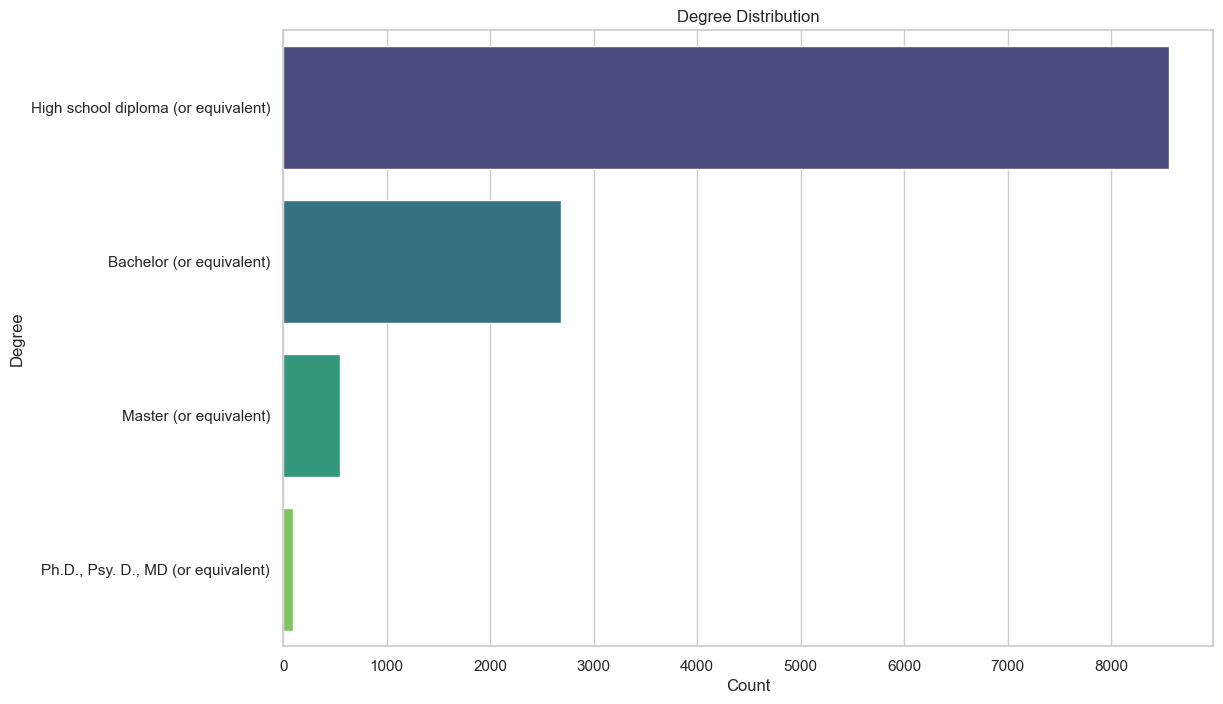

In [186]:
# Plot 3: Degree Distribution
plt.figure(figsize=(12, 8))
sns.countplot(y='Degree', data=data, palette='viridis', order=data['Degree'].value_counts().index)
plt.title('Degree Distribution')
plt.xlabel('Count')
plt.ylabel('Degree')
plt.show()

Degree Distribution: A bar chart showing the distribution of different educational degrees.

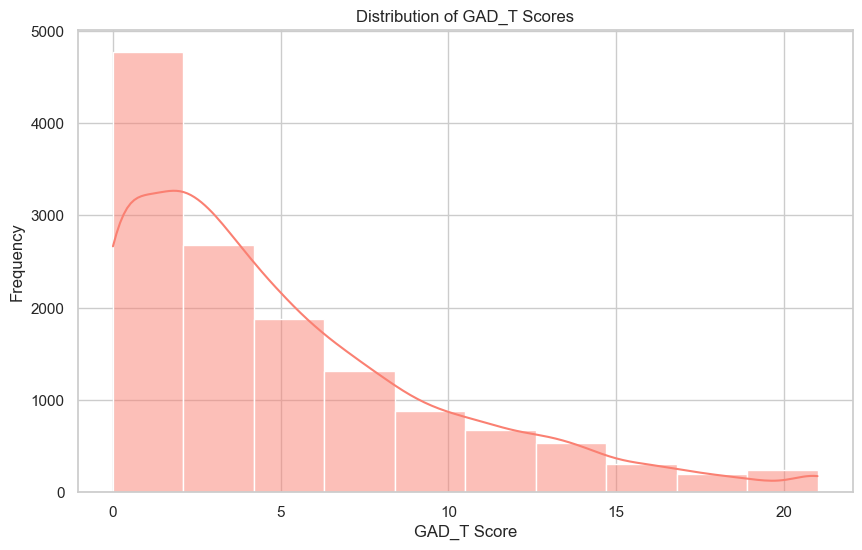

In [187]:
# Plot 4: GAD_T Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['GAD_T'], bins=10, kde=True, color='salmon')
plt.title('Distribution of GAD_T Scores')
plt.xlabel('GAD_T Score')
plt.ylabel('Frequency')
plt.show()


GAD_T Distribution: A histogram showing the distribution of Generalized Anxiety Disorder (GAD) total scores.


SWL_T vs SPIN_T Scatter Plot: A scatter plot showing the relationship between Satisfaction With Life (SWL) total scores and Social Phobia Inventory (SPIN) total scores.

***SPLITTING THE DATA INTO TRAINING AND TESTING***

In [230]:
# Assuming the target variable is named 'target'
X = df.drop(columns=['GADE'])
y = df['GADE']

In [231]:
# Initialize SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the entire dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Optionally, split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [232]:
X_train

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Hours,Gender,Age,Work,Degree,GAD_T,SWL_T
5728,1,0,0,2,1,2,0,5,5,5,6,4,6,50.000000,1,18,1,1,6,25
8100,1,0,2,0,0,1,0,5,5,6,6,7,6,20.000000,1,19,1,1,4,29
3576,1,1,1,1,0,1,1,4,4,4,5,4,6,12.000000,1,23,1,0,6,21
9027,1,0,1,0,0,0,0,4,4,4,3,4,6,7.000000,1,19,1,1,2,19
22713,3,2,2,1,2,1,1,1,1,2,1,5,2,30.000000,1,18,1,1,14,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,1,0,1,0,0,1,0,3,3,5,6,5,6,12.000000,1,21,1,0,4,23
5390,0,0,0,0,0,1,0,2,2,2,2,1,7,25.000000,1,19,0,1,1,9
860,0,0,0,0,1,0,0,6,5,6,6,6,6,40.000000,1,21,1,1,1,29
15795,2,2,2,0,1,2,1,2,2,1,1,1,6,21.220261,1,18,3,1,11,8


In [233]:
y_train

5728     1
8100     1
3576     1
9027     2
22713    3
        ..
21575    2
5390     1
860      1
15795    0
23654    3
Name: GADE, Length: 19278, dtype: int32

In [234]:
X_test

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Hours,Gender,Age,Work,Degree,GAD_T,SWL_T
27370,1,1,1,1,0,1,0,2,2,2,2,1,6,15.989981,1,21,0,1,6,11
22608,1,0,1,0,0,0,0,4,6,6,5,6,6,15.700062,1,19,0,1,4,28
3843,0,0,0,0,0,0,0,5,5,6,2,1,6,28.000000,1,18,1,1,0,19
2907,2,1,3,2,1,2,1,1,4,4,4,2,0,25.000000,1,20,0,1,12,15
12139,3,3,3,3,1,0,3,3,3,3,2,1,7,10.000000,1,18,1,1,16,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6705,0,0,0,0,0,0,0,5,6,6,3,3,6,35.000000,1,32,0,1,0,23
2392,0,1,1,1,0,2,0,5,6,6,6,6,6,20.000000,1,27,0,2,5,29
9069,2,2,2,2,1,1,0,5,5,5,6,3,6,20.000000,1,19,1,1,10,24
4373,0,0,0,0,0,0,0,4,3,5,2,1,0,18.000000,1,19,1,1,0,15


In [235]:
y_test

27370    3
22608    3
3843     1
2907     2
12139    2
        ..
6705     1
2392     2
9069     3
4373     2
17933    0
Name: GADE, Length: 8262, dtype: int32

***IMPLEMENTING THE EXISTING ALGORITHMS***

In [236]:
from sklearn.neighbors import KNeighborsClassifier
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy for KNN: {accuracy_knn:.2f}')



Accuracy for KNN: 0.78


In [237]:
# Classification Report
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))


Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      2047
           1       0.73      0.66      0.69      2121
           2       0.65      0.51      0.57      2050
           3       0.80      0.95      0.87      2044

    accuracy                           0.78      8262
   macro avg       0.77      0.78      0.77      8262
weighted avg       0.77      0.78      0.77      8262



In [238]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN:\n", cm_knn)

Confusion Matrix for KNN:
 [[2036    0    4    7]
 [  50 1404  526  141]
 [ 163  495 1049  343]
 [  47   23   29 1945]]


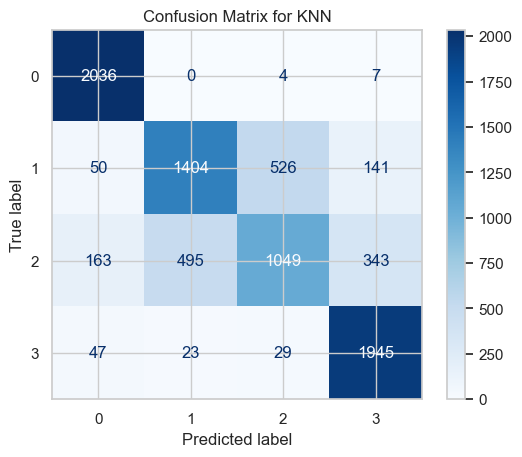

In [239]:
# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN')
plt.show()

The confusion matrix displayed above is for the K-Nearest Neighbors (KNN) classification model. It provides a detailed view of the model's performance by comparing the true labels against the predicted labels. The matrix is structured with the true labels on the vertical axis and the predicted labels on the horizontal axis. Each cell in the matrix represents the count of instances where the corresponding true label was predicted as a specific label.

The first row indicates that out of the instances truly labeled as class 0, 2036 were correctly classified as 0, while 4 were incorrectly classified as 2, and 7 were incorrectly classified as 3.

The second row shows that out of the instances truly labeled as class 1, 1404 were correctly classified as 1. However, 50 instances were misclassified as 0, 526 as 2, and 141 as 3.

The third row indicates that for instances truly labeled as class 2, 1049 were correctly classified. However, 163 were misclassified as 0, 495 as 1, and 343 as 3.

The fourth row reveals that for instances truly labeled as class 3, 1945 were correctly classified. However, 47 were misclassified as 0, 23 as 1, and 29 as 2.

The color intensity in each cell indicates the number of instances, with darker colors representing higher counts. This visualization helps identify where the model is performing well and where it is making errors. For example, it shows that the model performs well in classifying classes 0 and 3 but has higher misclassification rates for classes 1 and 2

In [240]:
from sklearn.linear_model import LogisticRegression


# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy for LR: {accuracy_lr:.2f}')

Accuracy for LR: 0.60


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [241]:
# Classification Report
print("Classification Report for LR:\n", classification_report(y_test, y_pred_lr))


Classification Report for LR:
               precision    recall  f1-score   support

           0       0.62      0.68      0.65      2047
           1       0.69      0.76      0.72      2121
           2       0.55      0.52      0.53      2050
           3       0.53      0.45      0.49      2044

    accuracy                           0.60      8262
   macro avg       0.60      0.60      0.60      8262
weighted avg       0.60      0.60      0.60      8262



In [242]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix for LR:\n", cm_lr)

Confusion Matrix for LR:
 [[1400    7   91  549]
 [  13 1606  501    1]
 [ 108  612 1065  265]
 [ 733   97  290  924]]


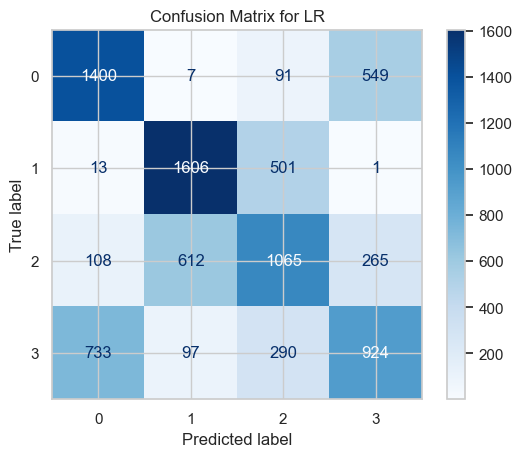

In [243]:
# Plot Confusion Matrix
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr.classes_)
disp_lr.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for LR')
plt.show()

The confusion matrix shown above is for the Logistic Regression (LR) classification model. This matrix provides a detailed breakdown of the model's performance by illustrating how the true labels are distributed across the predicted labels. The true labels are represented on the vertical axis, while the predicted labels are represented on the horizontal axis. Each cell contains the count of instances where the true label was predicted as a specific label.

In the first row, the matrix shows that out of the instances truly labeled as class 0, 1400 were correctly classified as 0. However, 7 were incorrectly classified as 1, 91 as 2, and 549 as 3.

The second row indicates that out of the instances truly labeled as class 1, 1606 were correctly classified as 1. Yet, 13 were misclassified as 0, 501 as 2, and 1 as 3.

The third row reveals that for instances truly labeled as class 2, 1065 were correctly classified. However, 108 were misclassified as 0, 612 as 1, and 265 as 3.

The fourth row indicates that out of the instances truly labeled as class 3, 924 were correctly classified as 3. However, 733 were misclassified as 0, 97 as 1, and 290 as 2.

The color intensity of each cell represents the number of instances, with darker colors indicating higher counts. This visualization helps identify areas where the model is performing well and where it is making errors. 
For example, the model shows strong performance in classifying classes 1 and 2, but there are significant misclassifications for class 3, particularly being misclassified as class 0. The overall distribution of predictions reveals insights into the strengths and weaknesses of the Logistic Regression model in this particular classification task.

In [244]:
from xgboost import XGBClassifier

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy for XGB: {accuracy_xgb:.2f}')



Accuracy for XGB: 0.80


In [245]:
# Classification Report
print("Classification Report for XGB:\n", classification_report(y_test, y_pred_xgb))



Classification Report for XGB:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      2047
           1       0.76      0.74      0.75      2121
           2       0.65      0.63      0.64      2050
           3       0.86      0.87      0.86      2044

    accuracy                           0.80      8262
   macro avg       0.80      0.80      0.80      8262
weighted avg       0.80      0.80      0.80      8262



Confusion Matrix for XGB:
 [[1976    3   24   44]
 [  18 1566  509   28]
 [  72  460 1295  223]
 [  84   31  157 1772]]


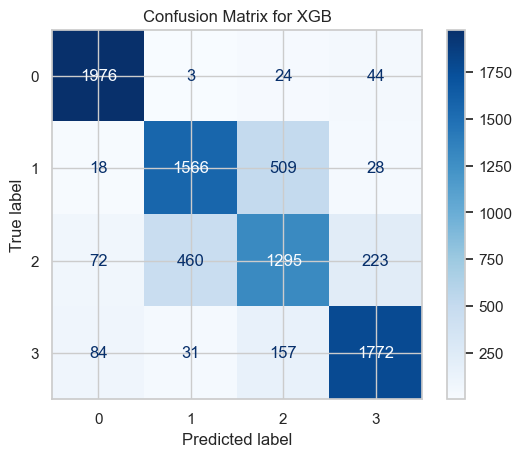

In [246]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix for XGB:\n", cm_xgb)

# Plot Confusion Matrix
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb.classes_)
disp_xgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGB')
plt.show()


The confusion matrix shown above is for the XGBoost (XGB) classification model, illustrating the model's performance by comparing the true labels against the predicted labels. The matrix is organized with the true labels on the vertical axis and the predicted labels on the horizontal axis. Each cell contains the count of instances where the true label was classified as a specific predicted label.

In the first row, for instances truly labeled as class 0, 1976 were correctly classified as 0, while 3 were misclassified as 1, 24 as 2, and 44 as 3.

The second row shows that out of the instances truly labeled as class 1, 1566 were correctly classified as 1. However, 18 were misclassified as 0, 509 as 2, and 28 as 3.

The third row indicates that for instances truly labeled as class 2, 1295 were correctly classified as 2. However, 72 were misclassified as 0, 460 as 1, and 223 as 3.

The fourth row shows that out of the instances truly labeled as class 3, 1772 were correctly classified as 3. However, 84 were misclassified as 0, 31 as 1, and 157 as 2.

The color intensity in each cell represents the number of instances, with darker colors indicating higher counts. This matrix helps identify the areas where the XGBoost model performs well and where it makes errors. For example, the model shows strong performance in classifying classes 0 and 3, but there are notable misclassifications for class 2, particularly being misclassified as class 1. This visualization provides valuable insights into the strengths and weaknesses of the XGBoost model in this classification task.

In [247]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy for NB: {accuracy_nb:.2f}')





Accuracy for NB: 0.52


In [248]:
# Classification Report
print("Classification Report for NB:\n", classification_report(y_test, y_pred_nb))



Classification Report for NB:
               precision    recall  f1-score   support

           0       0.54      0.77      0.63      2047
           1       0.62      0.79      0.70      2121
           2       0.40      0.40      0.40      2050
           3       0.35      0.10      0.15      2044

    accuracy                           0.52      8262
   macro avg       0.48      0.52      0.47      8262
weighted avg       0.48      0.52      0.47      8262



Confusion Matrix for NB:
 [[1572   27  259  189]
 [  41 1685  353   42]
 [ 301  790  821  138]
 [1007  208  627  202]]


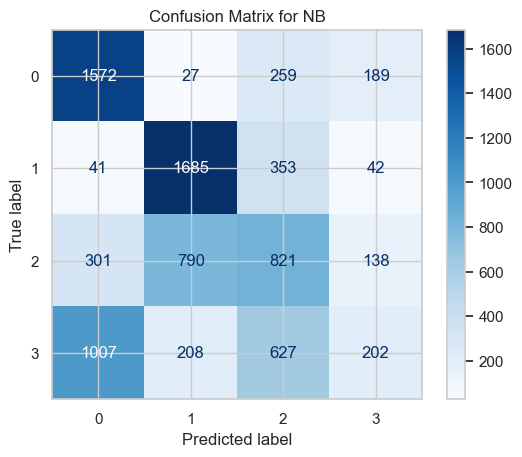

In [249]:
# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix for NB:\n", cm_nb)

# Plot Confusion Matrix
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb.classes_)
disp_nb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for NB')
plt.show()

The confusion matrix displayed in the image provides a comprehensive summary of the performance of a Naive Bayes (NB) classifier. The matrix is organized in a grid format where the rows represent the true labels and the columns represent the predicted labels. Each cell in the matrix indicates the number of instances for which the corresponding true label was predicted as the respective predicted label.

Here is a detailed breakdown of the confusion matrix:

True label 0:

Correctly classified as 0: 1572 instances
Incorrectly classified as 1: 27 instances
Incorrectly classified as 2: 259 instances
Incorrectly classified as 3: 189 instances

True label 1:

Correctly classified as 1: 1685 instances
Incorrectly classified as 0: 41 instances
Incorrectly classified as 2: 353 instances
Incorrectly classified as 3: 42 instances

True label 2:

Correctly classified as 2: 821 instances
Incorrectly classified as 0: 301 instances
Incorrectly classified as 1: 790 instances
Incorrectly classified as 3: 138 instances

True label 3:

Correctly classified as 3: 202 instances
Incorrectly classified as 0: 1007 instances
Incorrectly classified as 1: 208 instances
Incorrectly classified as 2: 627 instances
The diagonal elements (1572, 1685, 821, and 202) indicate the number of correctly classified instances for each label. The off-diagonal elements show the misclassifications, which help identify where the model is making errors. For instance, there are notable misclassifications of label 3 as label 0 (1007 instances) and label 2 as label 1 (790 instances), indicating potential areas where the classifier might be improved.

The color intensity in each cell reflects the number of instances, with darker shades representing higher counts. This visual representation helps quickly identify the strengths and weaknesses of the classifier in distinguishing between different classes.

In [250]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy for RF: {accuracy_rf:.2f}')




Accuracy for RF: 0.82


In [251]:
# Classification Report
print("Classification Report for RF:\n", classification_report(y_test, y_pred_rf))



Classification Report for RF:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      2047
           1       0.77      0.73      0.75      2121
           2       0.69      0.66      0.68      2050
           3       0.88      0.93      0.90      2044

    accuracy                           0.82      8262
   macro avg       0.82      0.83      0.82      8262
weighted avg       0.82      0.82      0.82      8262



Confusion Matrix for RF:
 [[2007    3   23   14]
 [  17 1556  508   40]
 [  65  423 1354  208]
 [  35   36   74 1899]]


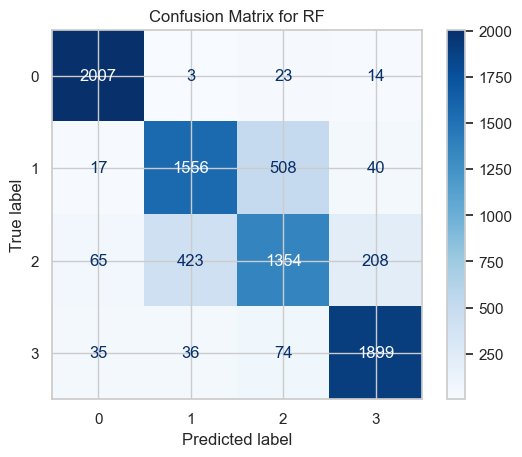

In [252]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for RF:\n", cm_rf)

# Plot Confusion Matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for RF')
plt.show()


The confusion matrix displayed above is for the Random Forest (RF) classification model. It provides a detailed comparison of the true labels against the predicted labels, showing how the model performed for each class. The true labels are represented on the vertical axis, and the predicted labels are on the horizontal axis. Each cell in the matrix indicates the number of instances where the true label was classified as a specific predicted label.

In the first row, for instances truly labeled as class 0, 2007 were correctly classified as 0, while 3 were misclassified as 1, 23 as 2, and 14 as 3.

The second row shows that out of the instances truly labeled as class 1, 1556 were correctly classified as 1. However, 17 were misclassified as 0, 508 as 2, and 40 as 3.

The third row indicates that for instances truly labeled as class 2, 1354 were correctly classified as 2. However, 65 were misclassified as 0, 423 as 1, and 208 as 3.

The fourth row reveals that out of the instances truly labeled as class 3, 1899 were correctly classified as 3. However, 35 were misclassified as 0, 36 as 1, and 74 as 2.

The color intensity of each cell represents the number of instances, with darker colors indicating higher counts. This matrix helps identify areas where the Random Forest model performs well and where it makes errors. For example, the model shows strong performance in classifying classes 0 and 3, but there are some misclassifications for class 2, particularly being misclassified as class 1. This visualization provides valuable insights into the strengths and weaknesses of the Random Forest model in this classification task.

***IMPLEMENTING THE PROPOSED ALGORITHMS***

In [255]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree model
dt = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

# Predict using the best model
best_dt = grid_search.best_estimator_
y_pred_dt = best_dt.predict(X_test)

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy for tuned DT: {accuracy_dt:.2f}')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found: {'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best cross-validation accuracy: 0.71
Accuracy for tuned DT: 0.72


In [256]:
# Save the model
joblib.dump(best_dt, 'tuned_dt_model.pkl')

['tuned_dt_model.pkl']

In [257]:
# Classification Report
print("Classification Report for tuned DT:\n", classification_report(y_test, y_pred_dt))


Classification Report for tuned DT:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      2047
           1       0.69      0.62      0.65      2121
           2       0.54      0.54      0.54      2050
           3       0.75      0.80      0.78      2044

    accuracy                           0.72      8262
   macro avg       0.72      0.72      0.72      8262
weighted avg       0.71      0.72      0.72      8262



Confusion Matrix for tuned DT:
 [[1873   21   59   94]
 [  38 1320  650  113]
 [ 111  507 1100  332]
 [ 121   66  215 1642]]


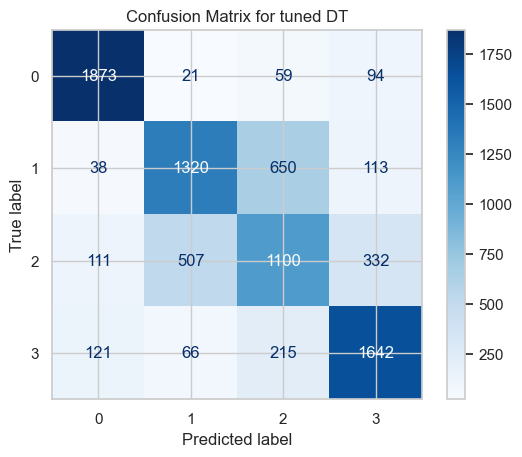

In [258]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for tuned DT:\n", cm_dt)

# Plot Confusion Matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=best_dt.classes_)
disp_dt.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for tuned DT')
plt.show()


The confusion matrix shown above is for a tuned Decision Tree (DT) classification model. It illustrates the performance of the model by comparing the true labels against the predicted labels. The true labels are represented on the vertical axis, and the predicted labels are on the horizontal axis. Each cell in the matrix shows the count of instances where the true label was predicted as a specific label.

In the first row, for instances truly labeled as class 0, 1873 were correctly classified as 0, while 21 were misclassified as 1, 59 as 2, and 94 as 3.

The second row indicates that out of the instances truly labeled as class 1, 1320 were correctly classified as 1. However, 38 were misclassified as 0, 650 as 2, and 113 as 3.

The third row reveals that for instances truly labeled as class 2, 1100 were correctly classified as 2. However, 111 were misclassified as 0, 507 as 1, and 332 as 3.

The fourth row shows that out of the instances truly labeled as class 3, 1642 were correctly classified as 3. However, 121 were misclassified as 0, 66 as 1, and 215 as 2.

The color intensity in each cell represents the number of instances, with darker colors indicating higher counts. This visualization helps identify the areas where the tuned Decision Tree model performs well and where it makes errors. For example, the model shows a strong performance in classifying class 0 and class 3 but has notable misclassifications for class 2, particularly being misclassified as class 1. This matrix provides valuable insights into the model's strengths and weaknesses, guiding further tuning and improvements.

In [259]:
# Define parameter grids for the base models
from sklearn.ensemble import StackingClassifier
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Create the base models
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
lr = LogisticRegression()
nb = GaussianNB()

# Tune hyperparameters for each base model
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_

grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_

# Define the stacking classifier with the best base models
estimators = [
    ('dt', best_dt),
    ('rf', best_rf),
    ('xgb', best_xgb),
    ('lr', best_lr),
    ('nb', nb)  # Naive Bayes does not require hyperparameter tuning
]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Fit the stacking classifier
stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_test)

# Accuracy
accuracy_stack = accuracy_score(y_test, y_pred_stack)
print(f'Accuracy for Stacking Classifier: {accuracy_stack:.2f}')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Stacking Classifier: 0.86


In [260]:


# Save the model
joblib.dump(stacking_clf, 'stacking_model.pkl')


['stacking_model.pkl']

In [261]:
# Classification Report
print("Classification Report for Stacking Classifier:\n", classification_report(y_test, y_pred_stack))




Classification Report for Stacking Classifier:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2047
           1       0.78      0.79      0.78      2121
           2       0.73      0.72      0.72      2050
           3       0.94      0.93      0.94      2044

    accuracy                           0.86      8262
   macro avg       0.86      0.86      0.86      8262
weighted avg       0.85      0.86      0.85      8262



Confusion Matrix for Stacking Classifier:
 [[2009    5   22   11]
 [   7 1670  433   11]
 [  26  442 1479  103]
 [  20   20   97 1907]]


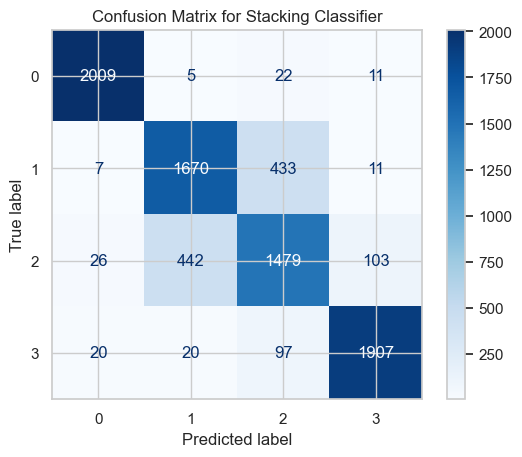

In [262]:
# Confusion Matrix
cm_stack = confusion_matrix(y_test, y_pred_stack)
print("Confusion Matrix for Stacking Classifier:\n", cm_stack)

# Plot Confusion Matrix
disp_stack = ConfusionMatrixDisplay(confusion_matrix=cm_stack, display_labels=stacking_clf.classes_)
disp_stack.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Stacking Classifier')
plt.show()

The confusion matrix shown above is for a Stacking Classifier model, providing a detailed view of the model's performance by comparing the true labels with the predicted labels. The true labels are on the vertical axis, and the predicted labels are on the horizontal axis. Each cell in the matrix represents the number of instances where the true label was classified as a specific predicted label.

In the first row, for instances truly labeled as class 0, 2009 were correctly classified as 0, while 5 were misclassified as 1, 22 as 2, and 11 as 3.

The second row indicates that out of the instances truly labeled as class 1, 1670 were correctly classified as 1. However, 7 were misclassified as 0, 433 as 2, and 11 as 3.

The third row reveals that for instances truly labeled as class 2, 1479 were correctly classified as 2. However, 26 were misclassified as 0, 442 as 1, and 103 as 3.

The fourth row shows that out of the instances truly labeled as class 3, 1907 were correctly classified as 3. However, 20 were misclassified as 0, 20 as 1, and 97 as 2.

The color intensity in each cell indicates the number of instances, with darker colors representing higher counts. This visualization helps identify areas where the Stacking Classifier model performs well and where it makes errors. For example, the model shows strong performance in classifying class 0 and class 3, but there are misclassifications for class 2, particularly being misclassified as class 1. This confusion matrix provides valuable insights into the model's strengths and weaknesses, guiding further optimization and improvements.

In [263]:
import joblib
import numpy as np

# Define the conditions
def get_difficulty(value):
    if value == 0:
        return "Extremely difficult"
    elif value == 1:
        return "Not difficult at all"
    elif value == 2:
        return "Somewhat difficult"
    elif value == 3:
        return "Very difficult"
    else:
        return value  

# The input list
abc = [[1,	0,	0,	2,	1,	2,	0,	5,	5,	5	,6	,4,	6,	50.000000,	1,	18,	1	,1,	6	,25]]

# Convert abc to numpy array for model prediction
abc_array = np.array(abc)

# Assuming stacking_clf is your trained stacking classifier
# Save the model
joblib.dump(stacking_clf, 'stacking_model.pkl')

# Load the model
loaded_model = joblib.load('stacking_model.pkl')

# Predict the output using the loaded model
predictions = loaded_model.predict(abc_array)

# Apply the conditions to the predictions
difficulty_predictions = [get_difficulty(value) for value in predictions]

# Print the results
for item in difficulty_predictions:
    print(item)


Not difficult at all


c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [264]:
import joblib
import numpy as np

# Define the conditions
def get_difficulty(value):
    if value == 0:
        return "Extremely difficult"
    elif value == 1:
        return "Not difficult at all"
    elif value == 2:
        return "Somewhat difficult"
    elif value == 3:
        return "Very difficult"
    else:
        return value  

# The input list
abc = [[1	,1,	1,	0,	0,	0,	0,	6,	7	,6,	5,	3,	6,	7.0,	1,	21,	1	,1,	3	,27]]

# Convert abc to numpy array for model prediction
abc_array = np.array(abc)

# Assuming stacking_clf is your trained stacking classifier
# Save the model
joblib.dump(stacking_clf, 'stacking_model.pkl')

# Load the model
loaded_model = joblib.load('stacking_model.pkl')

# Predict the output using the loaded model
predictions = loaded_model.predict(abc_array)

# Apply the conditions to the predictions
difficulty_predictions = [get_difficulty(value) for value in predictions]

# Print the results
for item in difficulty_predictions:
    print(item)

Somewhat difficult


c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [267]:
import joblib
import numpy as np

# Define the conditions
def get_difficulty(value):
    if value == 0:
        return "Extremely difficult"
    elif value == 1:
        return "Not difficult at all"
    elif value == 2:
        return "Somewhat difficult"
    elif value == 3:
        return "Very difficult"
    else:
        return value  

# The input list
abc = [[3,	2	,2	,1,	2,	1,	1,	1,	1	,2	,1,	5,	2,	30.000000,	1	,18,	1,	1,	14,	12]]

# Convert abc to numpy array for model prediction
abc_array = np.array(abc)

# Assuming stacking_clf is your trained stacking classifier
# Save the model
joblib.dump(stacking_clf, 'stacking_model.pkl')

# Load the model
loaded_model = joblib.load('stacking_model.pkl')

# Predict the output using the loaded model
predictions = loaded_model.predict(abc_array)

# Apply the conditions to the predictions
difficulty_predictions = [get_difficulty(value) for value in predictions]

# Print the results
for item in difficulty_predictions:
    print(item)

Very difficult


c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [266]:
import joblib
import numpy as np

# Define the conditions
def get_difficulty(value):
    if value == 0:
        return "Extremely difficult"
    elif value == 1:
        return "Not difficult at all"
    elif value == 2:
        return "Somewhat difficult"
    elif value == 3:
        return "Very difficult"
    else:
        return value  

# The input list
abc = [[2,	2,	2,	0	,1	,2,	1,	2,	2,	1,	1,	1	,6,	21.220261,	1	,18,	3,	1	,11,	8]]

# Convert abc to numpy array for model prediction
abc_array = np.array(abc)

# Assuming stacking_clf is your trained stacking classifier
# Save the model
joblib.dump(stacking_clf, 'stacking_model.pkl')

# Load the model
loaded_model = joblib.load('stacking_model.pkl')

# Predict the output using the loaded model
predictions = loaded_model.predict(abc_array)

# Apply the conditions to the predictions
difficulty_predictions = [get_difficulty(value) for value in predictions]

# Print the results
for item in difficulty_predictions:
    print(item)

Extremely difficult


c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
